In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [5]:
# load the data
data = np.load('./crop/data_notmalized.npz')

In [6]:
data.files

['arr_0', 'arr_1']

In [7]:
X = data['arr_0'] # independent variables or features
y = data['arr_1'] # dependent variable

In [8]:
X.shape , y.shape

((5461, 10000), (5461,))

In [9]:
X

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.09803922, 0.09803922, 0.10196078, ..., 0.11764706, 0.12156863,
        0.13333333],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [12]:
X1 = X - X.mean(axis = 0)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=None, whiten=True,svd_solver='auto')

In [15]:
x_pca = pca.fit_transform(X1)

In [16]:
eigen_ratio = pca.explained_variance_ratio_
eigen_cum = np.cumsum(eigen_ratio)

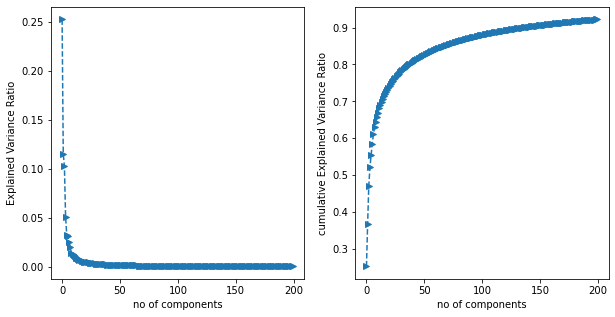

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'>--')
plt.xlabel('no of components')
plt.ylabel('Explained Variance Ratio')
plt.subplot(1,2,2)
plt.plot(eigen_cum[:200],'>--')
plt.xlabel('no of components')
plt.ylabel('cumulative Explained Variance Ratio')
plt.show()

conclusion: using elbow method, consider number of compoenent is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75 % 
so, in order to get min 80% variance I am considering 50 compoenents

In [23]:
pca_50 = PCA(n_components=50, whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [24]:
x_pca_50.shape

(5461, 50)

In [25]:
#saving pca
import pickle
pickle.dump(pca_50,open('./crop/pca_50.pickle','wb'))

In [35]:
# consider 50 components and inverse transform

x_pca_inv = pca_50.inverse_transform(x_pca_50)
x_pca_inv.shape

(5461, 10000)

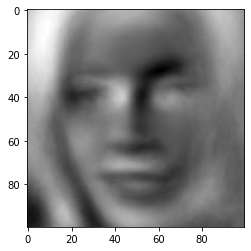

In [37]:
eigen_image = x_pca_inv[0,:]
eigen_image = eigen_image.reshape((100,100))
plt.imshow(eigen_image,cmap='gray')

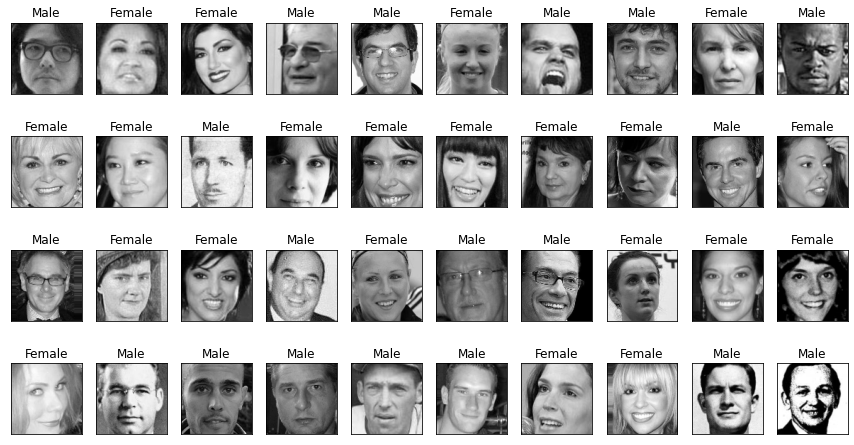

====================Eigen Images====================


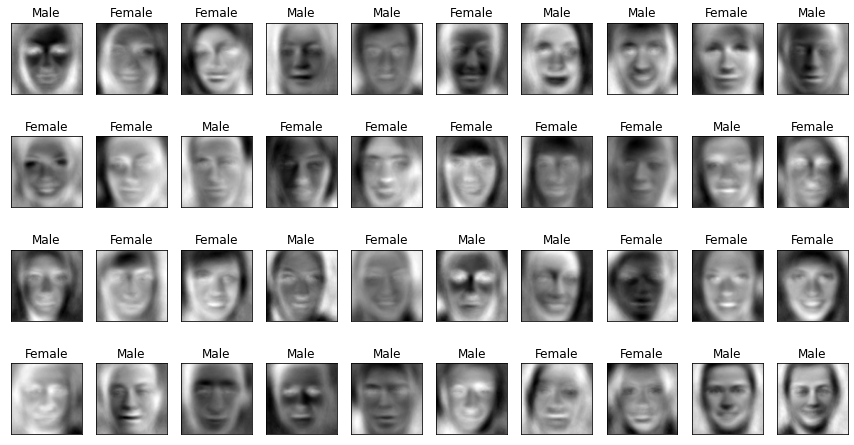

In [38]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [39]:
# saving
np.savez("./crop/data_pca_50_y_mean.pickle",x_pca_50,y,X.mean(axis=0))